<h1 align=center > Loan Status Prediction </h1>

In [108]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

In [109]:
df = pd.read_csv('data/loan_data_set.csv')
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
478,LP002531,Male,Yes,1,Graduate,Yes,16667,2250.0,86.0,360.0,1.0,Semiurban,Y
213,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,Y
587,LP002917,Female,No,0,Not Graduate,No,2165,0.0,70.0,360.0,1.0,Semiurban,Y


### Dimension of data

In [110]:
df.shape

(614, 13)

### How Many Null Values?

In [111]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### What type of data is?

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Data Cleaning

In [113]:
df.drop(columns=['Loan_ID'],inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [114]:
sns.set_context('paper', font_scale = 2)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### Separate out Categorical and Numerical Features

In [115]:
cat_cols = df.select_dtypes(exclude=np.number).columns.to_list()
print("Categorical columns : ", cat_cols)

Categorical columns :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [116]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
print("Numerical columns : ", num_cols)

Numerical columns :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [117]:
num_df = df[num_cols]
num_df.sample(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
120,5667,2667.0,180.0,360.0,1.0
421,2720,0.0,80.0,NaN,0.0
187,2383,2138.0,58.0,360.0,NaN
29,3750,2083.0,120.0,360.0,1.0
41,1800,1213.0,47.0,360.0,1.0


In [118]:
cat_df = df[cat_cols]
cat_df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
68,Male,Yes,3+,Not Graduate,Yes,Urban,Y
519,Female,No,0,Not Graduate,No,Rural,N
231,Male,Yes,0,Graduate,NaN,Rural,Y
346,Male,Yes,NaN,Not Graduate,No,Rural,N
219,Female,Yes,2,Graduate,No,Semiurban,Y


<h1 align=center > Exploratory Data Analysis </h1>

In [119]:
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: 'Yes' if x == 'Y' else 'No')

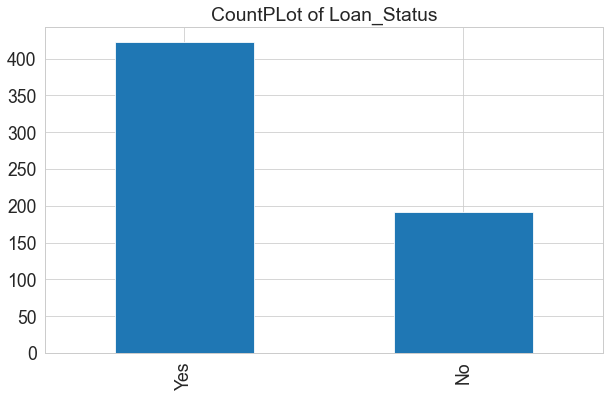

In [120]:
df['Loan_Status'].value_counts().plot(kind='bar')
plt.title('CountPLot of Loan_Status');

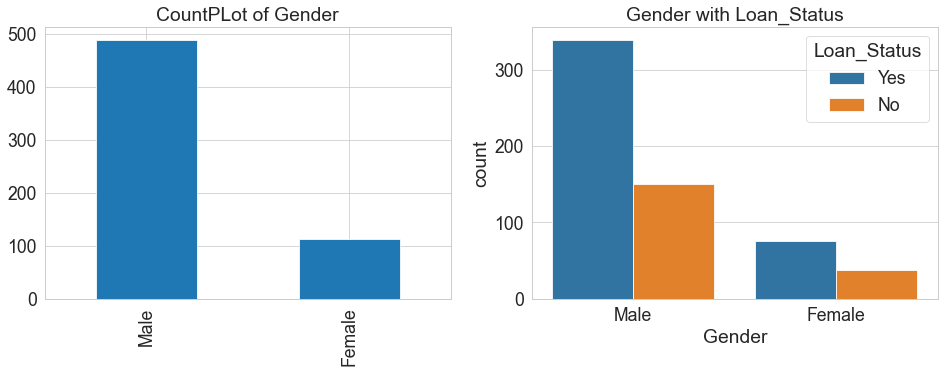

In [121]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Gender'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('CountPLot of Gender')
sns.countplot(x = df['Gender'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Gender with Loan_Status');

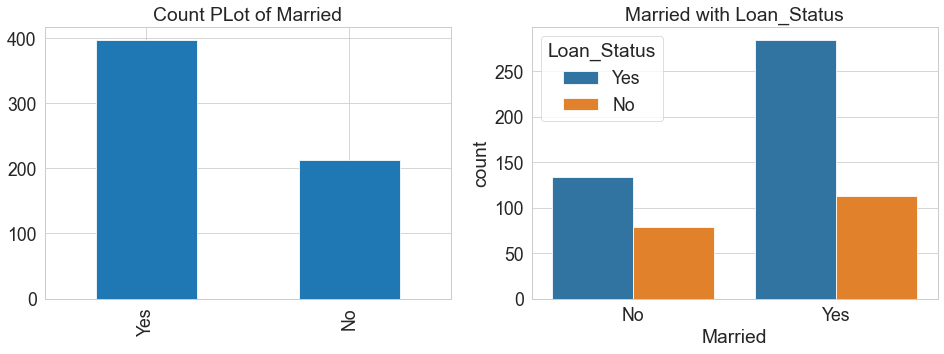

In [122]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Married'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Married')
sns.countplot(x = df['Married'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Married with Loan_Status');

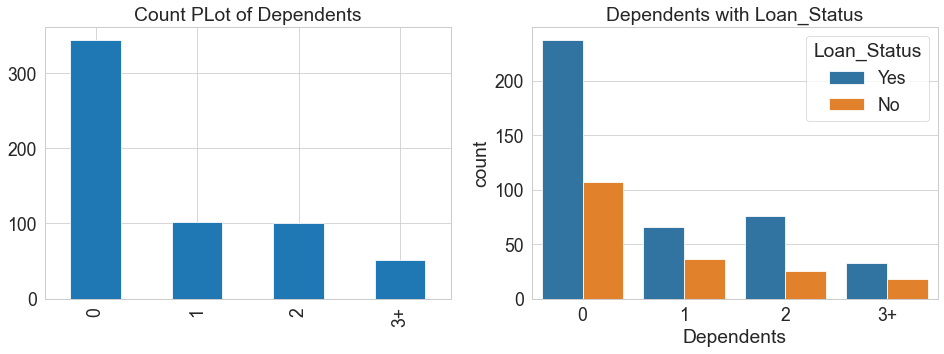

In [123]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Dependents'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Dependents')
sns.countplot(x = df['Dependents'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Dependents with Loan_Status');

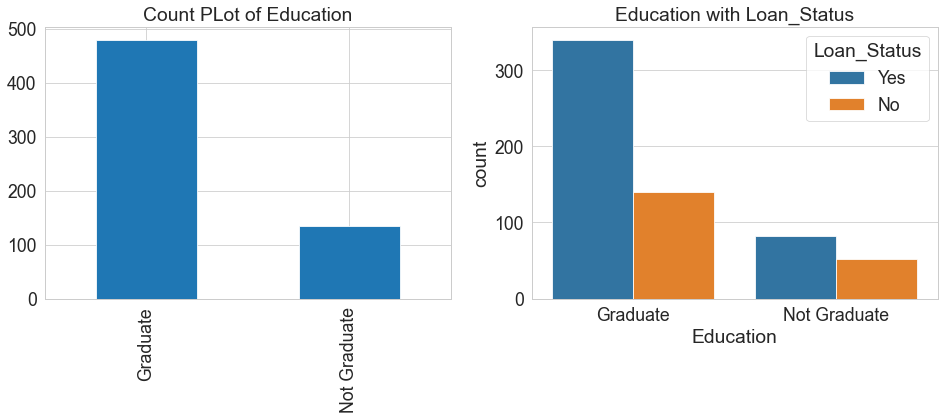

In [124]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Education'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Education')
sns.countplot(x = df['Education'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Education with Loan_Status');

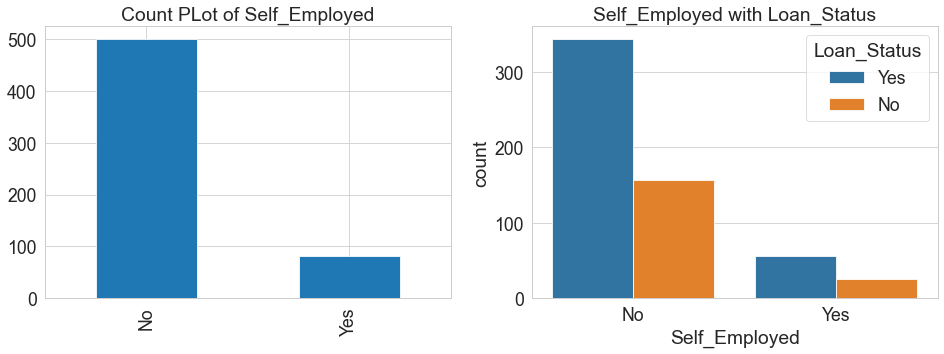

In [130]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Self_Employed'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Self_Employed')
sns.countplot(x = df['Self_Employed'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Self_Employed with Loan_Status');

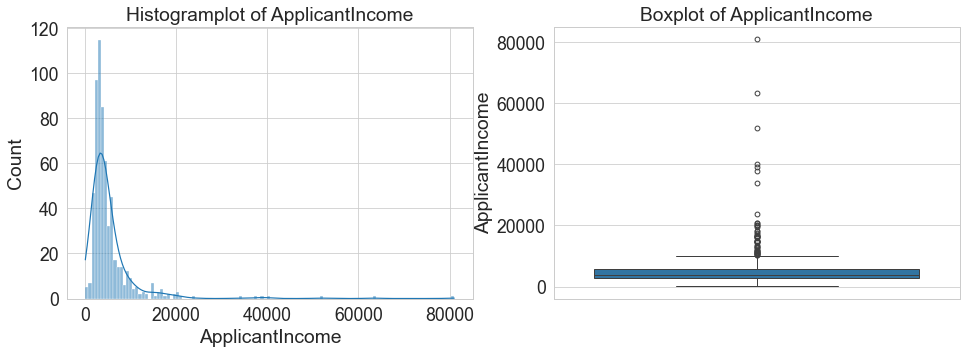

In [131]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
sns.histplot(df['ApplicantIncome'],kde=True,ax=ax1)
ax1.set_title('Histogramplot of ApplicantIncome')
sns.boxplot(df['ApplicantIncome'],ax=ax2)
ax2.set_title('Boxplot of ApplicantIncome');

In [132]:
df['ApplicantIncome'].skew()

6.539513113994625

In [133]:
iqr = df['ApplicantIncome'].quantile(0.75) - df['ApplicantIncome'].quantile(0.25)
upper_limit= df['ApplicantIncome'].quantile(0.75) + iqr *1.5

In [134]:
tmp = df['ApplicantIncome']
df['ApplicantIncome']= np.where(df['ApplicantIncome'] >upper_limit,upper_limit,df['ApplicantIncome'])

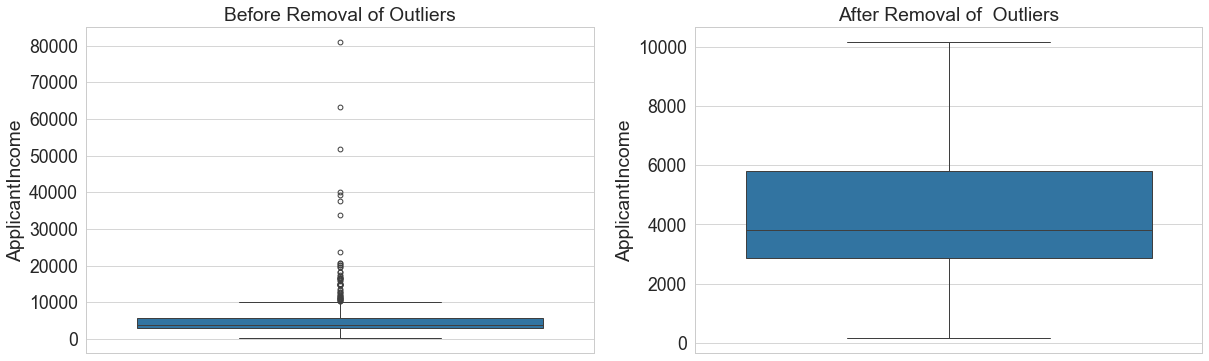

In [135]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
ax1.set_title('Before Removal of Outliers')
sns.boxplot(tmp,ax=ax1);
ax2.set_title('After Removal of  Outliers');
sns.boxplot(df['ApplicantIncome'],ax=ax2);

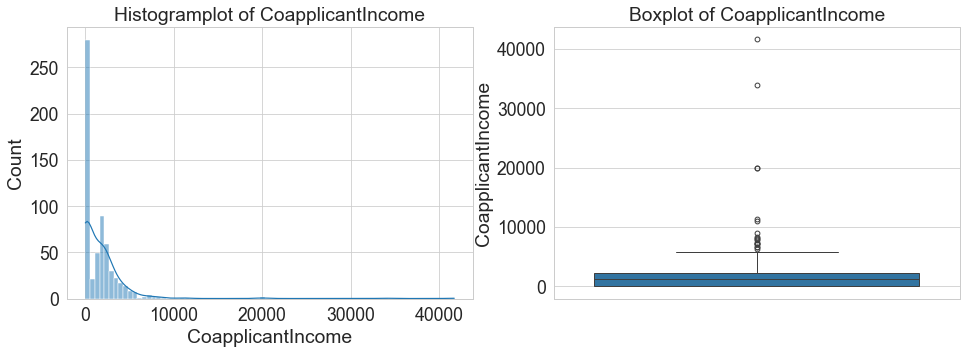

In [136]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
sns.histplot(df['CoapplicantIncome'],kde=True,ax=ax1)
ax1.set_title('Histogramplot of CoapplicantIncome')
sns.boxplot(df['CoapplicantIncome'],ax=ax2)
ax2.set_title('Boxplot of CoapplicantIncome');

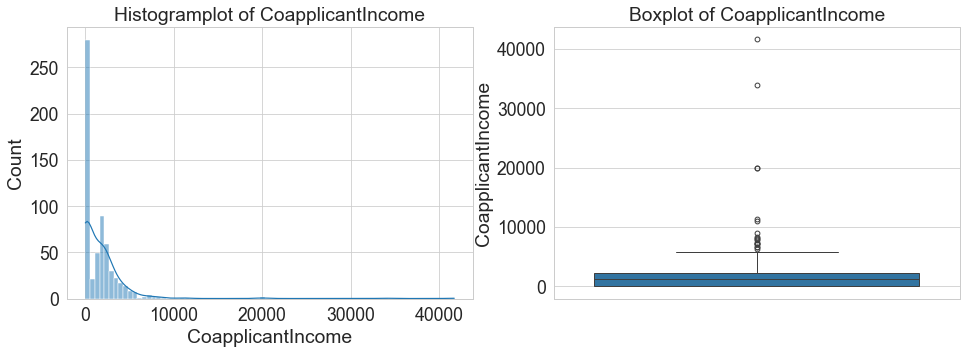

In [137]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
sns.histplot(df['CoapplicantIncome'],kde=True,ax=ax1)
ax1.set_title('Histogramplot of CoapplicantIncome')
sns.boxplot(df['CoapplicantIncome'],ax=ax2)
ax2.set_title('Boxplot of CoapplicantIncome');

In [138]:
iqr = df['CoapplicantIncome'].quantile(0.75) - df['CoapplicantIncome'].quantile(0.25)
upper_limit= df['CoapplicantIncome'].quantile(0.75) + iqr *1.5

In [139]:
tmp = df['CoapplicantIncome']
df['CoapplicantIncome']= np.where(df['CoapplicantIncome'] >upper_limit,upper_limit,df['CoapplicantIncome'])

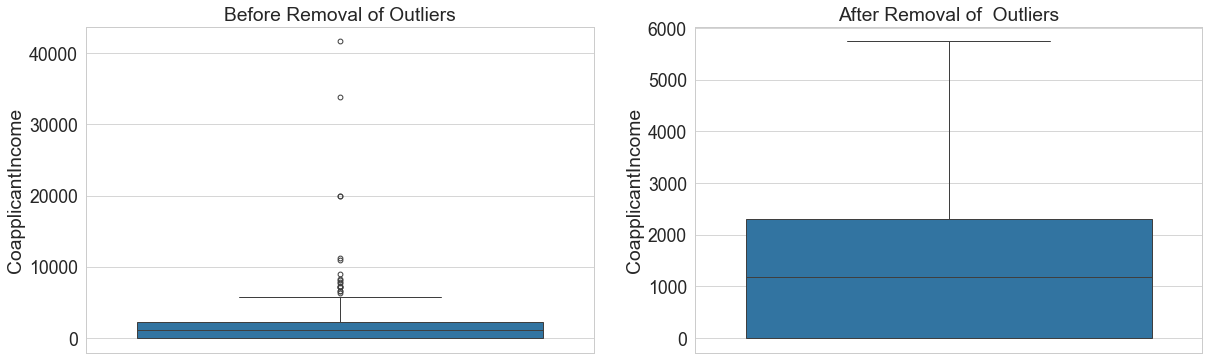

In [140]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
ax1.set_title('Before Removal of Outliers')
sns.boxplot(tmp,ax=ax1);
ax2.set_title('After Removal of  Outliers');
sns.boxplot(df['CoapplicantIncome'],ax=ax2);

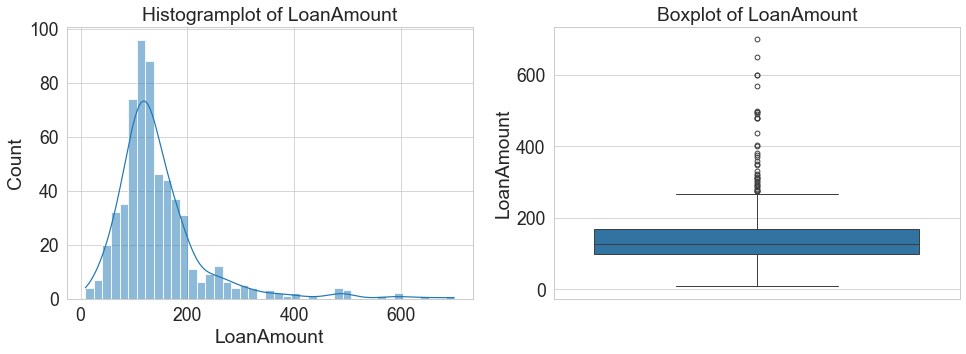

In [142]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
sns.histplot(df['LoanAmount'],kde=True,ax=ax1)
ax1.set_title('Histogramplot of LoanAmount')
sns.boxplot(df['LoanAmount'],ax=ax2)
ax2.set_title('Boxplot of LoanAmount');

In [143]:
df['LoanAmount'].skew()

2.677551679256059

In [144]:
iqr = df['LoanAmount'].quantile(0.75) - df['LoanAmount'].quantile(0.25)
upper_limit= df['LoanAmount'].quantile(0.75) + iqr *1.5

In [145]:
tmp = df['LoanAmount']
df['LoanAmount']= np.where(df['LoanAmount'] >upper_limit,upper_limit,df['LoanAmount'])

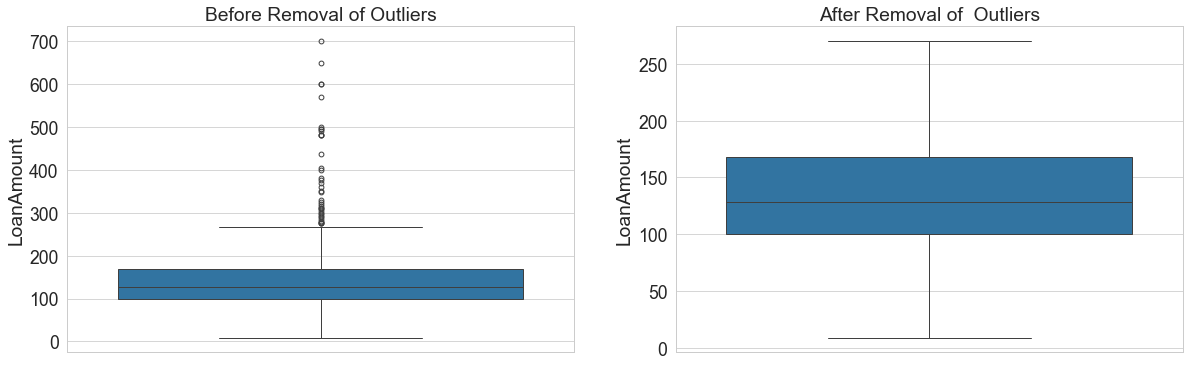

In [146]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
ax1.set_title('Before Removal of Outliers')
sns.boxplot(tmp,ax=ax1);
ax2.set_title('After Removal of  Outliers');
sns.boxplot(df['LoanAmount'],ax=ax2);

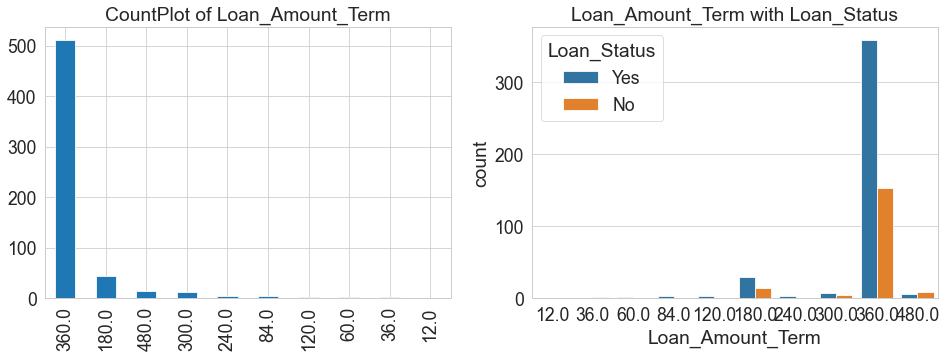

In [147]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Loan_Amount_Term'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('CountPlot of Loan_Amount_Term')
sns.countplot(x = df['Loan_Amount_Term'], hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Loan_Amount_Term with Loan_Status');

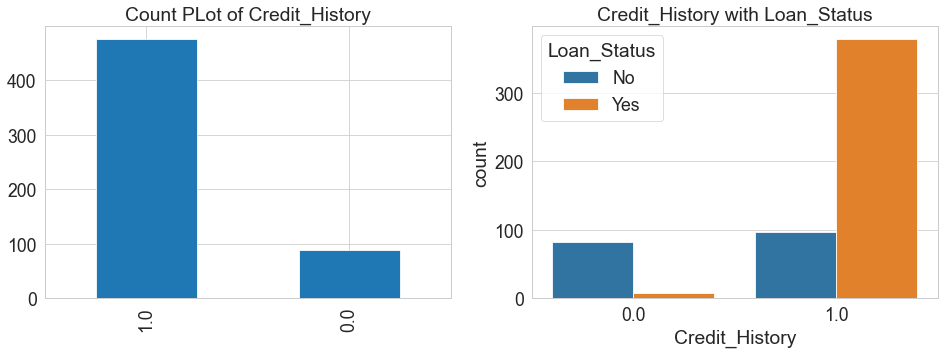

In [148]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Credit_History'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Credit_History')
sns.countplot(x = df['Credit_History'],hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Credit_History with Loan_Status');

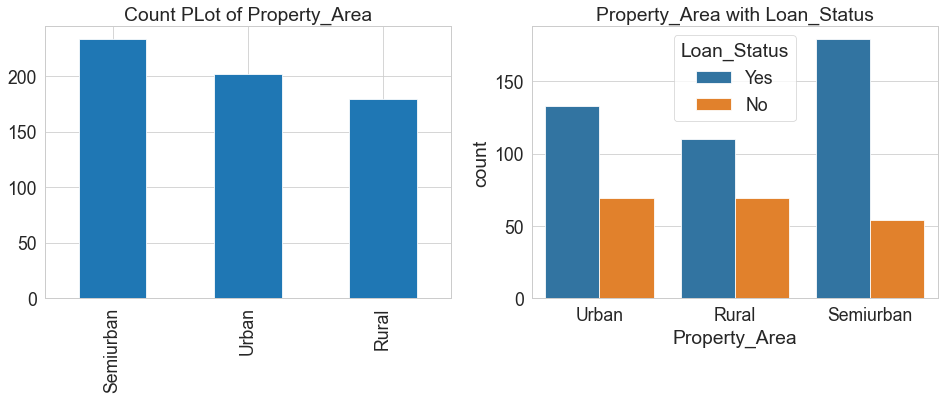

In [149]:
fig = plt.figure(figsize=(16,5))
(ax1,ax2) = fig.subplots(1,2)
df['Property_Area'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_title('Count PLot of Property_Area')
sns.countplot(x = df['Property_Area'],hue = df['Loan_Status'],ax=ax2)
ax2.set_title('Property_Area with Loan_Status');

### Feature Selection

### chi_test

In [150]:
from scipy.stats import chi2_contingency
catagorical_cols = [0,1,2,3,4,8,9,10]
cols_drop = []
score = []
for i in catagorical_cols:
    
    ct = pd.crosstab(df['Loan_Status'], df[df.columns[i]])
    
    chi2_stats, p_value, dof, expected_frequency = chi2_contingency(ct)

    if p_value > 0.05:
        cols_drop.append(df.columns[i])    
    score.append(p_value)

In [151]:
len(cols_drop)

4

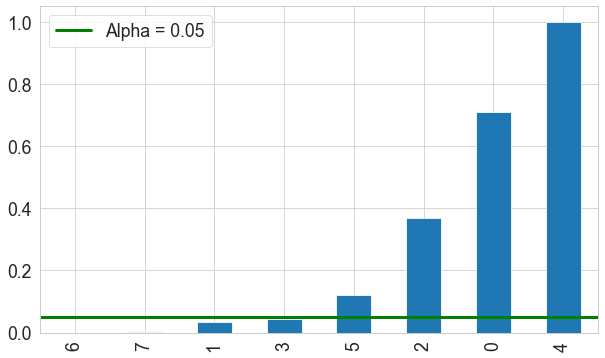

In [152]:
pd.Series(score).sort_values(ascending=True).plot(kind='bar')
plt.axhline(y=0.05, color='g', label='Alpha = 0.05', linewidth=3)
plt.legend()  # Add this line to display the legend
plt.show()

In [153]:
df.drop(columns=cols_drop,inplace=True)
df.head(5)

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,No,Graduate,5849.0,0.0,NaN,1.0,Urban,Yes
1,Yes,Graduate,4583.0,1508.0,128.0,1.0,Rural,No
2,Yes,Graduate,3000.0,0.0,66.0,1.0,Urban,Yes
3,Yes,Not Graduate,2583.0,2358.0,120.0,1.0,Urban,Yes
4,No,Graduate,6000.0,0.0,141.0,1.0,Urban,Yes


In [154]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [155]:
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: 1 if x == 'Yes' else 0)

In [156]:
X = df.drop(columns=['Loan_Status'])
y = df[['Loan_Status']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
from sklearn.pipeline import Pipeline

numeric_cols = [2,3,4]
categorical_cols = [0,5] 
ordinal = [1]

numeric_transformer = Pipeline(steps=[
    ('imputer1', SimpleImputer(strategy='mean')),
    ('standardization', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False,drop='first'))
])


ord_encoder = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='most_frequent')),
     ('ord', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('ord',ord_encoder ,ordinal)
    ])

# Creating the pipeline with preprocessing and linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])


In [158]:
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [159]:
x_train.shape

(491, 6)

In [160]:
x_test.shape

(123, 6)

In [161]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

### Logistic Regression

In [162]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
predictions = logreg.predict(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [163]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7886


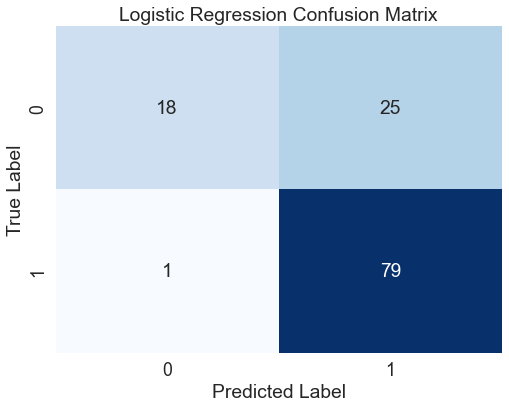

In [164]:
confusion_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [165]:
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



### Decision Tree

In [166]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
predictions = dt_classifier.predict(x_test)

In [167]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6911


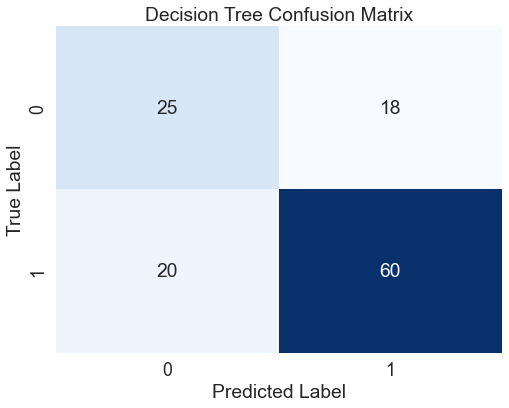

In [168]:
confusion_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues" ,cbar=False)
plt.title(f"Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [169]:
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57        43
           1       0.77      0.75      0.76        80

    accuracy                           0.69       123
   macro avg       0.66      0.67      0.66       123
weighted avg       0.69      0.69      0.69       123



### Random Forest

In [170]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
predictions = rf_classifier.predict(x_test)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14424\3154804548.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train, y_train)


In [171]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7805


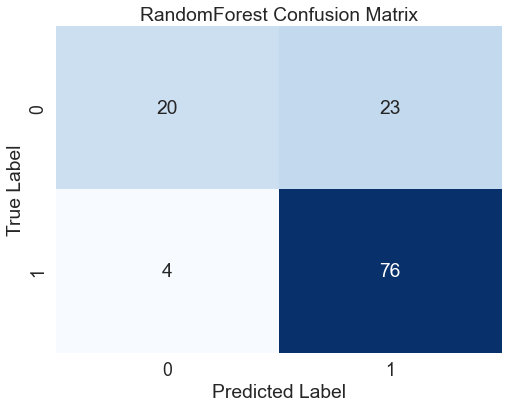

In [172]:
confusion_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"RandomForest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [173]:
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.47      0.60        43
           1       0.77      0.95      0.85        80

    accuracy                           0.78       123
   macro avg       0.80      0.71      0.72       123
weighted avg       0.79      0.78      0.76       123



### AdaBoost

In [174]:
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(x_train, y_train)
predictions = adaboost_classifier.predict(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [175]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7724


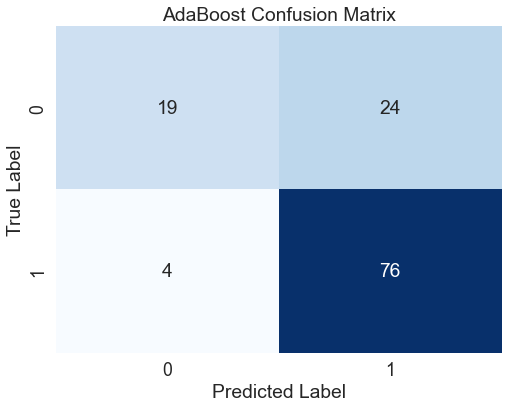

In [176]:
confusion_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"AdaBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [177]:
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.44      0.58        43
           1       0.76      0.95      0.84        80

    accuracy                           0.77       123
   macro avg       0.79      0.70      0.71       123
weighted avg       0.78      0.77      0.75       123



### Gradient Boosting

In [178]:
gradientboost_classifier = GradientBoostingClassifier()
gradientboost_classifier.fit(x_train, y_train)
predictions = gradientboost_classifier.predict(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [179]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7398


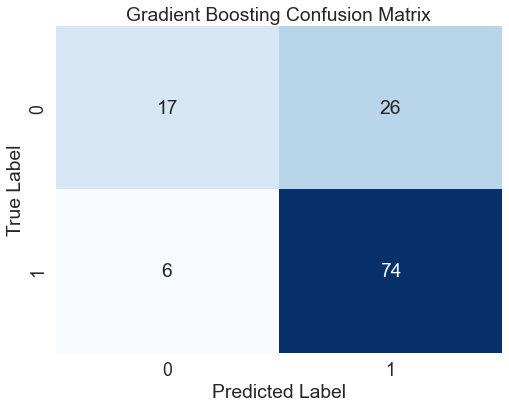

In [180]:
confusion_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [181]:
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.40      0.52        43
           1       0.74      0.93      0.82        80

    accuracy                           0.74       123
   macro avg       0.74      0.66      0.67       123
weighted avg       0.74      0.74      0.71       123



### Support Vector Machine (SVM)

In [182]:
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
predictions = svm_classifier.predict(x_test)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [183]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7886


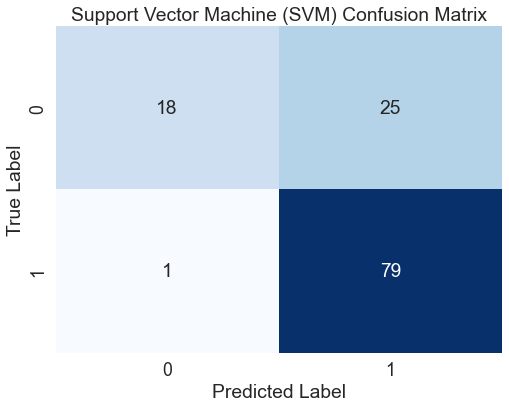

In [184]:
confusion_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"Support Vector Machine (SVM) Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [185]:
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



### XGBoost

In [186]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)
predictions = xgb_classifier.predict(x_test)

In [187]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7642


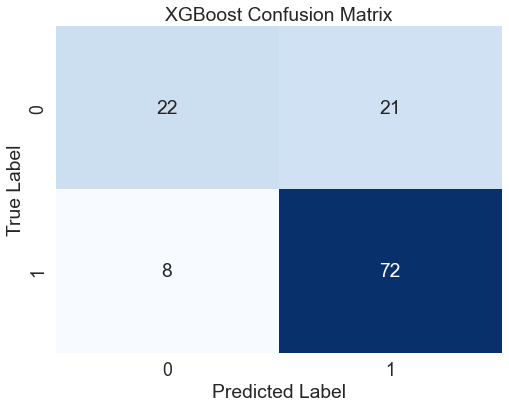

In [188]:
confusion_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f"XGBoost Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [189]:
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.51      0.60        43
           1       0.77      0.90      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.71      0.72       123
weighted avg       0.76      0.76      0.75       123



In [190]:
X = df.drop(columns=['Loan_Status'])
y = df[['Loan_Status']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Engineering PipeLine

In [191]:
from sklearn.pipeline import Pipeline

numeric_cols = [2,3,4]
categorical_cols = [0,5] 
ordinal = [1]

numeric_transformer = Pipeline(steps=[
    ('imputer1', SimpleImputer(strategy='mean')),
    ('standardization', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False,drop='first'))
])


ord_encoder = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='most_frequent')),
     ('ord', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('ord',ord_encoder ,ordinal)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',SVC())
])


In [192]:
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)
y_pred

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Deploying  Model 

In [193]:
import pickle
pickle.dump(pipeline,open('Loan Status predictions.pkl','wb'))

In [194]:
pipe = pickle.load(open('Loan Status predictions.pkl','rb'))

In [195]:
test_input2 = np.array([ 'No', 'Graduate',2833.0,1857.0,126.0,1.0,'Rural'],dtype=object).reshape(1,7)

In [196]:
pipe.predict(test_input2)

C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([1], dtype=int64)